In [97]:
%matplotlib inline
isdark = False

In [98]:
from rayoptics.environment import *
from rayoptics.elem.elements import Element
from rayoptics.raytr.trace import apply_paraxial_vignetting

In [99]:
opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

In [100]:
#osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=60.84)
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=0.98)
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0., 19.98])

In [101]:
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)

In [102]:
opm.system_spec.title = 'Nikkor Z 58mm f0.95 - WO 2019/229849 Example 1'
opm.system_spec.dimensions = 'MM'

In [103]:
opm.radius_mode = True

In [104]:
d22 = 2.68
sm.gaps[0].thi=1e10
sm.add_surface([108.488,7.65,1.902650,35.77])
sm.add_surface([-848.550,2.80,1.552981,55.07])  
sm.add_surface([50.252,18.12])
sm.add_surface([-60.720,2.80,1.612660,44.46])
sm.add_surface([2497.500,9.15,1.593190,67.90])
sm.add_surface([-77.239,0.40])
sm.add_surface([113.763,10.95,1.848500,43.79])
sm.add_surface([-178.060,0.40])
sm.add_surface([70.659,9.74,1.593190,67.90])
sm.add_surface([-1968.500,0.20])
sm.add_surface([289.687,8.00,1.593190,67.90])
sm.add_surface([-97.087,2.80,1.738000,32.33])
sm.add_surface([47.074,8.70])
sm.add_surface([0, 5.29])
sm.set_stop()
sm.add_surface([-95.230,2.20,1.612660,44.46])
sm.add_surface([41.204,11.55,1.497820,82.57])
sm.add_surface([-273.092,0.20])
sm.add_surface([76.173,9.50,1.883000,40.69])
sm.add_surface([-101.575,0.20])
sm.add_surface([176.128,7.45,1.953750,32.33])
sm.add_surface([-67.221,1.80,1.738000,32.33])
sm.add_surface([55.510,d22])
sm.add_surface([71.413,6.35,1.883000,40.69])
sm.add_surface([-115.025,1.81,1.698950,30.13])
sm.add_surface([46.943,0.80])
sm.add_surface([55.281,9.11,1.883000,40.69])
sm.add_surface([-144.041,3.00,1.765538,46.76])
sm.add_surface([52.858,14.50])
sm.add_surface([0,1.60,1.516800,64.14])
sm.gaps[-1].thi = 1.0

asp1 = EvenPolynomial(r=108.488, ec=0.,
                        coefs=[0.,-3.82177E-07,-6.06486E-11,-3.80172E-15,-1.32266E-18])
asp20 = EvenPolynomial(r=176.128, ec=0.,
                        coefs=[0.,-1.15028E-06,-4.51771E-10,2.72670E-13,-7.66812E-17])
asp28 = EvenPolynomial(r=52.858, ec=0.,
                        coefs=[0.,3.18645E-06,-1.14718E-08,7.74567E-11,-2.24225E-13,3.34790E-16,-1.70470E-19])

sm.ifcs[1].profile = asp1
sm.ifcs[20].profile = asp20
sm.ifcs[28].profile = asp28

sm.ifcs[1].max_aperture = 66.80 / 2.0
sm.ifcs[2].max_aperture = 65.82 / 2.0
sm.ifcs[3].max_aperture = 57.94 / 2.0
sm.ifcs[4].max_aperture = 58.28 / 2.0
sm.ifcs[5].max_aperture = 65.32 / 2.0
sm.ifcs[6].max_aperture = 65.32 / 2.0
sm.ifcs[7].max_aperture = 70.90 / 2.0
sm.ifcs[8].max_aperture = 70.90 / 2.0
sm.ifcs[9].max_aperture = 65.00 / 2.0
sm.ifcs[10].max_aperture = 65.00 / 2.0
sm.ifcs[11].max_aperture = 61.06 / 2.0
sm.ifcs[12].max_aperture = 59.42 / 2.0
sm.ifcs[13].max_aperture = 50.24 / 2.0
sm.ifcs[14].max_aperture = 47.918 / 2.0
sm.ifcs[15].max_aperture = 49.92 / 2.0
sm.ifcs[16].max_aperture = 49.92 / 2.0
sm.ifcs[17].max_aperture = 49.92 / 2.0
sm.ifcs[18].max_aperture = 51.12 / 2.0
sm.ifcs[19].max_aperture = 51.12 / 2.0
sm.ifcs[20].max_aperture = 46.80 / 2.0
sm.ifcs[21].max_aperture = 45.36 / 2.0
sm.ifcs[22].max_aperture = 39.84 / 2.0
sm.ifcs[23].max_aperture = 39.46 / 2.0
sm.ifcs[24].max_aperture = 39.46 / 2.0
sm.ifcs[25].max_aperture = 39.46 / 2.0
sm.ifcs[26].max_aperture = 38.94 / 2.0
sm.ifcs[27].max_aperture = 38.28 / 2.0
sm.ifcs[28].max_aperture = 38.28 / 2.0
sm.ifcs[29].max_aperture = 44.30 / 2.0


sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(profile=EvenPolynomial(c=0.009217609320846545, cc=-1.0, coefs=[0.0, -3.82177e-07, -6.06486e-11, -3.80172e-15, -1.32266e-18]), interact_mode=transmit)
2 Surface(profile=Spherical(c=-0.0011784809380708267), interact_mode=transmit)
3 Surface(profile=Spherical(c=0.01989970548435883), interact_mode=transmit)
4 Surface(profile=Spherical(c=-0.016469038208168644), interact_mode=transmit)
5 Surface(profile=Spherical(c=0.0004004004004004004), interact_mode=transmit)
6 Surface(profile=Spherical(c=-0.012946827379950543), interact_mode=transmit)
7 Surface(profile=Spherical(c=0.008790204196443482), interact_mode=transmit)
8 Surface(profile=Spherical(c=-0.005616084465910367), interact_mode=transmit)
9 Surface(profile=Spherical(c=0.014152478806662986), interact_mode=transmit)
10 Surface(profile=Spherical(c=-0.000508001016002032), interact_mode=transmit)
11 Surface(profile=Spherical(c=0.003452001643152782), interact_mode=t

In [105]:
sm.list_gaps()

0 Gap(t=10000000000.0, medium=Air())
1 Gap(t=7.65, medium=Glass(nd=1.90265, vd=35.77, mat='', cat=''))
2 Gap(t=2.8, medium=Glass(nd=1.552981, vd=55.07, mat='', cat=''))
3 Gap(t=18.12, medium=Air())
4 Gap(t=2.8, medium=Glass(nd=1.61266, vd=44.46, mat='', cat=''))
5 Gap(t=9.15, medium=Glass(nd=1.59319, vd=67.9, mat='', cat=''))
6 Gap(t=0.4, medium=Air())
7 Gap(t=10.95, medium=Glass(nd=1.8485, vd=43.79, mat='', cat=''))
8 Gap(t=0.4, medium=Air())
9 Gap(t=9.74, medium=Glass(nd=1.59319, vd=67.9, mat='', cat=''))
10 Gap(t=0.2, medium=Air())
11 Gap(t=8.0, medium=Glass(nd=1.59319, vd=67.9, mat='', cat=''))
12 Gap(t=2.8, medium=Glass(nd=1.738, vd=32.33, mat='', cat=''))
13 Gap(t=8.7, medium=Air())
14 Gap(t=5.29, medium=Air())
15 Gap(t=2.2, medium=Glass(nd=1.61266, vd=44.46, mat='', cat=''))
16 Gap(t=11.55, medium=Glass(nd=1.49782, vd=82.57, mat='', cat=''))
17 Gap(t=0.2, medium=Air())
18 Gap(t=9.5, medium=Glass(nd=1.883, vd=40.69, mat='', cat=''))
19 Gap(t=0.2, medium=Air())
20 Gap(t=7.45, medi

In [106]:
opm.update_model()

In [107]:
sm.list_model()

             r            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+10       air             1  3.6357e+09
   1:   108.488000      7.65000   903.358             1      52.014
   2:  -848.550000      2.80000   553.551             1      52.448
   3:    50.252000      18.1200       air             1      43.977
   4:   -60.720000      2.80000   613.445             1      29.140
   5:  2497.500000      9.15000   593.679             1      32.660
   6:   -77.239000     0.400000       air             1      32.660
   7:   113.763000      10.9500   849.438             1      35.450
   8:  -178.060000     0.400000       air             1      35.450
   9:    70.659000      9.74000   593.679             1      32.500
  10: -1968.500000     0.200000       air             1      32.500
  11:   289.687000      8.00000   593.679             1      30.530
  12:   -97.087000      2.80000   738.323             1      29.710
  13:    47.074000      8.70000       air          

In [108]:
pm.first_order_data()

efl               59.62
ffl                1.66
pp1               61.28
bfl              -27.71
ppk               87.33
f/#                0.98
m               0.02328
red          -1.677e+08
obj_dist          1e+10
obj_ang           19.98
enp_dist          69.29
enp_radius        30.42
na obj        3.042e-09
n obj                 1
img_dist              1
img_ht            21.68
exp_dist         -76.62
exp_radius        26.82
na img          -0.4836
n img             1.517
optical invariant        11.06


In [109]:
opm.ele_model.elements_from_sequence(sm)

In [110]:
elmn = [e for e in opm.ele_model.elements if isinstance(e, Element)]
elmn[0].sd = 66.8/2
elmn[1].sd = 65.82/2
elmn[2].sd = 65.32/2
elmn[3].sd = 65.32/2
elmn[4].sd = 70.90/2
elmn[5].sd = 65.0/2
elmn[6].sd = 61.06/2
elmn[7].sd = 59.42/2
elmn[8].sd = 50.24/2
elmn[9].sd = 49.92/2
elmn[10].sd = 49.92/2
elmn[11].sd = 51.12/2
elmn[12].sd = 46.8/2
elmn[13].sd = 45.36/2
elmn[14].sd = 39.46/2
elmn[15].sd = 39.46/2
elmn[16].sd = 38.94/2
elmn[17].sd = 44.3/2

In [111]:
opm.ele_model.list_elements()

0: E1 (Element): Element: EvenPolynomial(c=0.009217609320846545, cc=-1.0, coefs=[0.0, -3.82177e-07, -6.06486e-11, -3.80172e-15, -1.32266e-18]), Spherical(c=-0.0011784809380708267), t=7.6500, sd=33.4000, glass: 903.358
1: E2 (Element): Element: Spherical(c=-0.0011784809380708267), Spherical(c=0.01989970548435883), t=2.8000, sd=32.9100, glass: 553.551
2: AirGap E2-E3 (AirGap): Gap(t=18.12, medium=Air())
3: E3 (Element): Element: Spherical(c=-0.016469038208168644), Spherical(c=0.0004004004004004004), t=2.8000, sd=32.6600, glass: 613.445
4: E4 (Element): Element: Spherical(c=0.0004004004004004004), Spherical(c=-0.012946827379950543), t=9.1500, sd=32.6600, glass: 593.679
5: AirGap E4-E5 (AirGap): Gap(t=0.4, medium=Air())
6: E5 (Element): Element: Spherical(c=0.008790204196443482), Spherical(c=-0.005616084465910367), t=10.9500, sd=35.4500, glass: 849.438
7: AirGap E5-E6 (AirGap): Gap(t=0.4, medium=Air())
8: E6 (Element): Element: Spherical(c=0.014152478806662986), Spherical(c=-0.000508001016

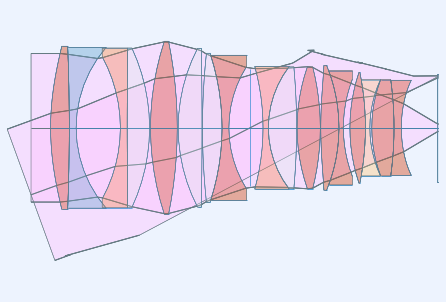

In [112]:
#apply_paraxial_vignetting(opm)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()

In [113]:
#for i, ifc in enumerate(sm.ifcs): 
#    sd = abs(pm.ax[i][0]) + abs(pm.pr[i][0]) 
#    ifc.set_max_aperture(sd)

In [114]:
#em = opm.ele_model 
#for i, e in enumerate(em.elements): 
#    if isinstance(e, elements.Element): 
#        sd1 = sm.ifcs[e.s1_indx].max_aperture 
#        sd2 = sm.ifcs[e.s2_indx].max_aperture 
#        e.sd = max(sd1, sd2)

In [115]:
#layout_plt = plt.figure(FigureClass=InteractiveLayout, 
#                        opt_model=opm, do_draw_rays=False, do_paraxial_layout=False, is_dark=isdark).plot()

In [116]:
#opm.ele_model.list_elements()

In [117]:
# Plot the transverse ray aberrations
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot the wavefront aberration
wav_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot spot diagrams
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm,
                      scale_type=Fit.User_Scale, user_scale_value=0.1, is_dark=isdark).plot()

TraceTIRError: (array([0.        , 0.26880816, 0.96319374]), array([-0.        ,  0.87507032,  0.48399579]), 1.559748017690377, 1.0)